In [164]:
## GRÁFICO DE VACINAS POR FAIXA ETÁRIA COM MATPLOTLIB
## idades abaixo dos 18 anos foram desconsideradas

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# banco retirado de <https://vacina.saude.rs.gov.br/sobre>
df = pd.read_csv('SESRS_VAC_APLICACAO_09_12_2021-10_33.csv', sep=';', encoding='cp1252')

In [166]:
# filtrando df / criando nova coluna / agrupando valores 
df_filtrado = df[['FAIXAETARIA','TP_VACINA']]
df_filtrado['COUNT'] = 1
df_filtrado = df_filtrado.groupby(by=['FAIXAETARIA','TP_VACINA']).count() 
df_filtrado.reset_index(inplace=True)

In [167]:
# remove 12 a 14 
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['FAIXAETARIA'] == '12 a 14'].index)

In [168]:
# remove 15 a 17 
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['FAIXAETARIA'] == '15 a 17'].index)

In [169]:
# criando novo df / criando nova coluna / agrupando valores
df_vac_total = df[['TP_VACINA']]
df_vac_total['COUNT_APLICADAS'] = 1
df_vac_total = df_vac_total.groupby(by=['TP_VACINA']).count()
df_vac_total.reset_index(inplace=True)

In [170]:
# juntando os dois dataframes com merge
df_filtrado = pd.merge(df_filtrado, df_vac_total[['TP_VACINA', 'COUNT_APLICADAS']], on='TP_VACINA', how='outer')

In [172]:
# porcentagem de vacinados por faixa etaria
df_filtrado['% APLICADAS'] = ((df_filtrado['COUNT']/df_filtrado['COUNT_APLICADAS'])*100).round(2)

In [174]:
# separando por vacina
pfizer = df_filtrado.loc[df_filtrado['TP_VACINA']=='Pfizer'].reset_index(drop=True)
astrazeneca = df_filtrado.loc[df_filtrado['TP_VACINA']=='AstraZeneca'].reset_index(drop=True)
coronavac = df_filtrado.loc[df_filtrado['TP_VACINA']=='CoronaVac'].reset_index(drop=True)
janssen = df_filtrado.loc[df_filtrado['TP_VACINA']=='Janssen'].reset_index(drop=True)

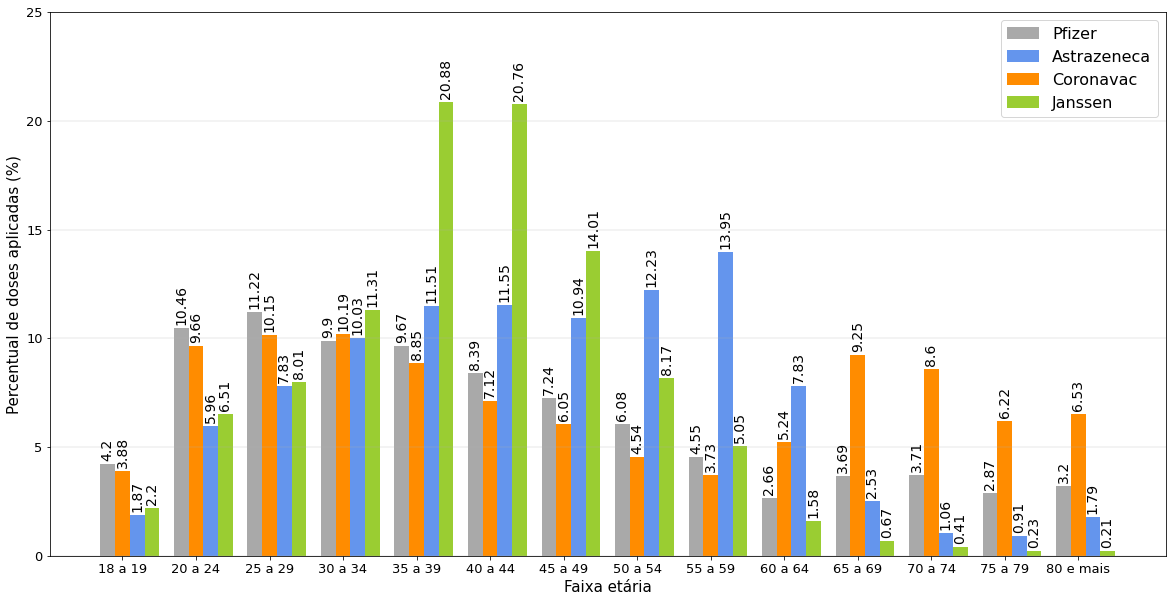

In [176]:
# criando gráfico
fig, ax = plt.subplots(figsize=(20,10))
width = 0.2

diameters = df_filtrado['FAIXAETARIA'].unique()
x = np.arange(len(diameters))

rects1 = plt.bar(x-0.2, pfizer['% APLICADAS'], width, label = 'Pfizer', color='darkgray')
rects2 = plt.bar(x+0.2, astrazeneca['% APLICADAS'], width, label = 'Astrazeneca', color='cornflowerblue')
rects3 = plt.bar(x, coronavac['% APLICADAS'], width, label = 'Coronavac', color='darkorange')
rects4 = plt.bar(x+0.4, janssen['% APLICADAS'], width, label = 'Janssen', color='yellowgreen')

plt.xticks(np.arange(0,14,1), (df_filtrado['FAIXAETARIA'].unique()), fontsize=13)
plt.yticks(fontsize=13)

plt.ylabel('Percentual de doses aplicadas (%)', fontsize=15)
plt.xlabel('Faixa etária', fontsize=15)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', rotation=90, fontsize=14)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.ylim(0,25)
plt.grid(axis='y', linewidth=0.3)
plt.legend(fontsize=16)
plt.savefig('Figura.png', dpi=(800), bbox_inches='tight')
plt.show()